In [14]:
#IMPORT required modules
import pandas as pd
import numpy as np
from datetime import datetime
import holidays
from matplotlib import pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression 
from sklearn.utils import check_random_state
from matplotlib.collections import LineCollection
%matplotlib inline

In [ ]:
elcdm = pd.read_csv('train.csv',sep=',')
elcdm = elcdm.drop(columns=['temperature','var1','var2','pressure','windspeed'])
elcdm.head()
plt.plot(elcdm['datetime'],elcdm['electricity_consumption'])

In [1]:
datacnt = pd.read_csv('countrydata.csv',sep=',')
datacnt.head()
india = datacnt.iloc[107].iloc[15:-4]
data = np.array([i for i in india])
#print(data)
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
yhat = model_fit.predict(len(data), len(data))
print(yhat)
plt.plot(data.append(yhat))

NameError: name 'pd' is not defined

Intercept: 
 -29499.721146916607
Coefficients: 
 [14.97410185]


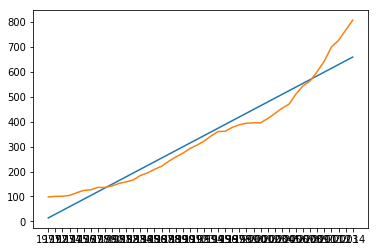

In [3]:
X = []
Y = []
#print(india)
for x,y in india.items():
    X.append([x])
    Y.append(y)
#print(len(X),len(Y))
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
X = [i[0] for i in X]
#print(X,regr.coef_[0])
Y_ = [ regr.coef_[0]*float(i) + regr.intercept_ for i in X]
plt.plot(X,Y_)
plt.plot(X,Y)

In [45]:
"""
isor = IsotonicRegression()
#x = [i[0] for i in x]
y_ = isor.fit(x[:-5],y[:-5])
print(y_.predict(x[-5:]))
plt.plot(x[:-5],y[:-5])
plt.plot(x[-5:],y_.predict(x[-5:]))
"""
print(x)
x = [[i] for i in x]
linr = LinearRegression()
linr.fit(x[:-5],y[:-5])
x = [i[0] for i in x]
y_ = [regr.coef_[0]*float(i) + regr.intercept_ for i in x]
plt.plot(x[-5:],y_[-5:])
plt.plot(x[:-5],y[:-5])

[[[1971.0]], [[1972.0]], [[1973.0]], [[1974.0]], [[1975.0]], [[1976.0]], [[1977.0]], [[1978.0]], [[1979.0]], [[1980.0]], [[1981.0]], [[1982.0]], [[1983.0]], [[1984.0]], [[1985.0]], [[1986.0]], [[1987.0]], [[1988.0]], [[1989.0]], [[1990.0]], [[1991.0]], [[1992.0]], [[1993.0]], [[1994.0]], [[1995.0]], [[1996.0]], [[1997.0]], [[1998.0]], [[1999.0]], [[2000.0]], [[2001.0]], [[2002.0]], [[2003.0]], [[2004.0]], [[2005.0]], [[2006.0]], [[2007.0]], [[2008.0]], [[2009.0]], [[2010.0]], [[2011.0]], [[2012.0]], [[2013.0]], [[2014.0]]]


ValueError: Found array with dim 4. Estimator expected <= 2.

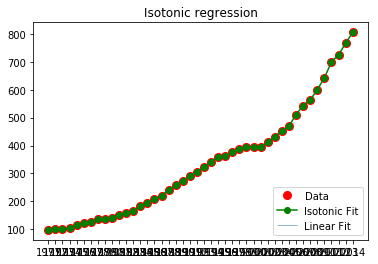

In [28]:
x = X
y = Y

ir = IsotonicRegression()

y_ = ir.fit_transform(x,y)

lr = LinearRegression()
x = [[i] for i in x]
lr.fit(x[:], y)  
x = [i[0] for i in x]

segments = [[[i, y[i]], [i, y_[i]]] for i in range(len(x))]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(len(x), 0.5))

fig = plt.figure()
plt.plot(x, y, 'r.', markersize=16)
plt.plot(x, y_, 'g.-', markersize=12)
x = [[ float(i) ] for i in x]
#print(lr.predict(x))
#plt.plot(x, lr.predict(x), 'b-')
#plt.plot(x,y)
#plt.plot(x,y_)

plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()


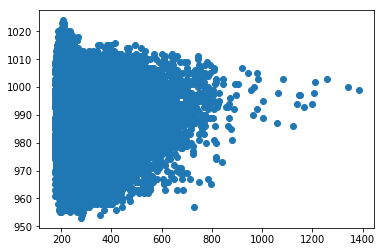

In [17]:
elec_csmp = pd.read_csv('train.csv',sep=',')
elec_csmp['datetime'] = pd.to_datetime(elec_csmp['datetime'])
#plt.scatter(elec_csmp['electricity_consumption'],elec_csmp['pressure'])

In [3]:
elec_csmp = elec_csmp.drop(columns=['var1','var2','temperature','pressure','windspeed'])

In [4]:
s = {1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:2,10:2,11:2,12:2}
season = pd.Series([s[i.month] for i in elec_csmp['datetime']])
elec_csmp['season'] = season

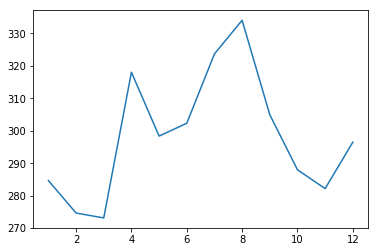

In [5]:
months = pd.Series([i.month for i in elec_csmp['datetime']])
elec_csmp['month'] = months
plt.plot(elec_csmp.groupby(['month']).mean()['electricity_consumption'] )

In [6]:
us_holidays = holidays.UnitedStates()
hldy = pd.Series([ 1 if (i in us_holidays) or (i.isoweekday()>5) else 0 for i in elec_csmp['datetime'] ])
elec_csmp['holiday'] = hldy

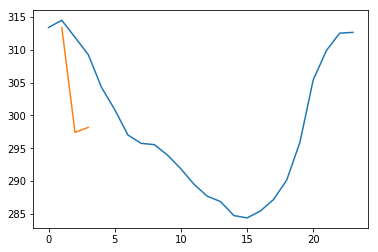

In [7]:
temp = pd.Series([i.hour for i in elec_csmp['datetime']])
elec_csmp['temp'] = temp
plt.plot(elec_csmp.groupby(['temp']).mean()['electricity_consumption'] )
j=0
xh = []
xno = []
for i in elec_csmp.groupby(['temp','holiday']).mean()['electricity_consumption']:
    if(j%2==0):
        xh.append(i)
    else:
        xno.append(i)
    j+=1
#plt.plot(xh)
#plt.plot(xno)
h = {0:1,1:2,2:2,3:2,4:2,5:2,6:2,7:2,8:2,9:2,10:2,11:2,12:2,13:2,14:2,15:3,16:3,17:3,18:3,19:3,20:3,21:3,22:3,23:3}
hours = pd.Series([h[i.hour] for i in elec_csmp['datetime']])
elec_csmp['hours'] = hours
plt.plot(elec_csmp.groupby(['hours']).mean()['electricity_consumption'])

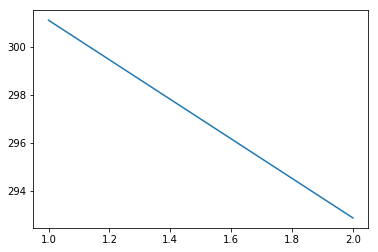

In [8]:
plt.plot(elec_csmp.groupby(['season']).mean()['electricity_consumption'])

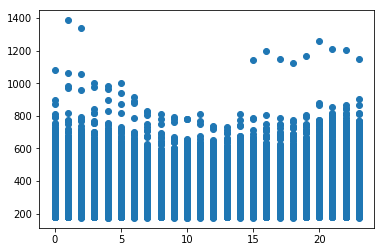

In [14]:
plt.scatter(elec_csmp['temp'],elec_csmp['electricity_consumption'])

In [10]:
#first 5 tuples of the tables
#elec_csmp = elec_csmp.drop(columns=['month'])
elec_csmp.head()
#plt.scatter(elec_csmp['electricity_consumption'],elec_csmp['season'])
#plt.scatter(elec_csmp['electricity_consumption'],elec_csmp['holiday'])
#plt.scatter(elec_csmp['electricity_consumption'],elec_csmp['hours'])
#print(elec_csmp['electricity_consumption'].mean())
#print(elec_csmp.groupby(['season']).mean())
#print(elec_csmp.groupby(['holiday']).mean())
#0 missing values
#print(sum(elec_csmp.isnull().values.ravel()))

,ID,datetime,electricity_consumption,season,month,holiday,temp,hours
0,0,2013-07-01 00:00:00,216.0,1,7,0,0,1
1,1,2013-07-01 01:00:00,210.0,1,7,0,1,2
2,2,2013-07-01 02:00:00,225.0,1,7,0,2,2
3,3,2013-07-01 03:00:00,216.0,1,7,0,3,2
4,4,2013-07-01 04:00:00,222.0,1,7,0,4,2


<b>Training samples : </b><br>
 The original nonnegative data series <i>X0</i> with <i>m</i> samples denotes the electricity consumption, which is expressed as follows:<br>
$$X0 = X0(0),X0(1)...X0(m) $$<br>

<b>1-AGO (one-time accumulating generation operation):</b><br>
$$X1 = X1(0),X1(1)....X1(m)$$ <br>
where
$$x1(k)=\sum_{i=0}^k x0(i)\ , \ k= 1,2,3,4..m$$ 


In [4]:
# X = required column for training
X = elec_csmp['electricity_consumption']
X0 = np.array(X)
X1 = np.cumsum(X0)

The general <b>GM(1,1)</b> is described by the following grey differential equation:<br>
<br>$$x(0)\:+a.z1(k)\:=\:b$$<br>

where a is the grey developmental coefficient and b is the grey control parameter. Thus,
<br>$$z1(k)\:=(1-\alpha).x1(k)\:+\:\alpha . x1(k-1)$$<br>

In [5]:
alpha = 0.5
Z1 = (1-alpha)*X1[1:] + alpha*X1[:-1]
#print((Z1))

In [12]:
#coefficient caclulation
B = np.vstack((-Z1,np.ones(len(Z1)))).T
Y = X0[1:]

#coef =[a,b] = (bt * b)inv * bt * y
coef = np.dot(B.T,B)
coef = np.linalg.inv(coef)
coef = np.dot(coef,B.T)
coef = np.dot(coef,Y)

In [19]:
print(f"a = {coef[0]} b = {coef[1]}")

a = 4.183686479715328e-07 b = 300.01952097917206
